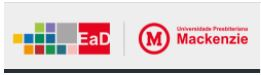

APRENDIZAGEM NÃO SUPERVISIONADA

Profa. Ma.Lilian Pires Pracidelli 

TURMA 01A – MATRÍCULA 92104843
Fernando Antonio Carvalho Pessoa

Tarefa da trilha 2: Executar o pré-processamento do KDD

#Dataset


## Descrição
As Regiões Metropolitanas e Aglomerações Urbanas são constituídas por agrupamentos de municípios limítrofes e são instituídas por lei complementar estadual, visando integrar a organização, o planejamento e a execução de funções públicas de interesse comum. Na listagem disponibilizada pelo IBGE constam também categorias associadas a esses recortes: colares metropolitanos, arcos metropolitanos, áreas de expansão metropolitana, subdivisões metropolitanas, dentre outras. 
As Regiões Integradas de Desenvolvimento, por sua vez, são definidas como regiões administrativas que abrangem diferentes unidades da federação. Esses recortes são criados por legislação específica, na qual as unidades da federação que as compõem são elencadas, além de definir a estrutura de funcionamento e os interesses das unidades político-administrativas participantes. 
No caso das RIDEs, a competência de criá-las é da União, por envolver municípios de mais de um Estado e/ou Distrito Federal.
Região integrada de desenvolvimento (Ride) é uma área análoga às regiões metropolitanas brasileiras, porém, situada em mais de uma unidade federativa.
 As Rides privilegiam ações econômicas (enquanto as regiões metropolitanas as ações sociais e de mobilidade) e são criadas por legislação federal específica, que delimita os municípios integrantes e fixa as competências assumidas pelo colegiado dos mesmos.

A primeira Ride estabelecida foi a Região Integrada de Desenvolvimento do Distrito Federal e Entorno. Em 2002, foram instituídas duas novas Rides, a Região Administrativa Integrada de Desenvolvimento do Polo Petrolina e Juazeiro e a Região Integrada de Desenvolvimento da Grande Teresina.
Está em discussão no Congresso brasileiro o projeto de lei complementar 122 de 2009 sobre a criação da Região Integrada de Desenvolvimento do Cariri-Araripe (RICA), reunindo localidades da região do Cariri-Araripe entre os estados do Ceará, Paraíba, Pernambuco e Piauí.
Paralelamente, está em discussão a expansão da Região Metropolitana de Marabá que, através do projeto de lei complementar de número 469 de 2013 criará a Região Integrada de Desenvolvimento do Bico do Papagaio (RIBP), com sede em Marabá, entre os estados do Pará, Tocantins e Maranhão. 

## Detalhes do dataset

O dataset é um arquivo ODS, uma planilha criada pelo programa Calc incluída na suíte Apache OpenOffice. Armazena dados em células que são organizadas em linhas e colunas. Os arquivos ODS são formatados usando o padrão baseado em OASIS OpenDocument XML.

**Fonte:** http://www.ibge.gov.br 

**Caminho:** http://landpage-h.cgu.gov.br/dadosabertos/index.php?url=https://geoftp.ibge.gov.br/organizacao_do_territorio/estrutura_territorial/municipios_por_regioes_metropolitanas/Situacao_2020a2029/Composicao_RMs_RIDEs_AglomUrbanas_2020_06_30.ods#

**Autor e Mantenedor:** Fundação Instituto Brasileiro de Geografia e Estatística

**Última Atualização:** 1 de dezembro de 2020, 21:03 (UTC-03:00)

**Cobertura Geográfica:**  Brasil   Órgão – Esfera Federal   Órgão – Poder Executivo

**Granularidade Temporal:**  Anual

A composição das Regiões Metropolitanas **(RMs)**, Aglomerações Urbanas **(AGLO)** e Regiões Integradas de Desenvolvimento **(RIDEs)** é disponibilizada pelo IBGE semestralmente, com data de referência o semestre anterior ao de divulgação. As informações são obtidas com os Estados e/ou Congresso Nacional, não sendo o IBGE a instituição responsável pela criação, modificação ou extinção desses arranjos políticos.

## Atributos

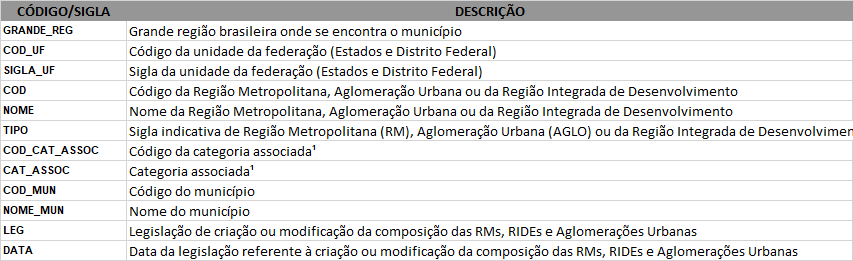

# Carga de Bibliotecas

In [1]:
#Manipulação de arquivo ODS
!pip install ezodf

     |████████████████████████████████| 125 kB 4.0 MB/s 
  Created wheel for ezodf: filename=ezodf-0.3.2-py2.py3-none-any.whl size=49002 sha256=379ad69ac2f709e570a49bd8bc361ce2175301e9d0153475e113699f58d534cb
  Stored in directory: /root/.cache/pip/wheels/8f/60/52/bffa36b97e0136aa62d54948d56e8770b96a5da7f9c65fdd85
Successfully built ezodf


In [2]:
## Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ezodf

## Carga do Dataset

In [5]:
doc = ezodf.opendoc('/content/Composicao_RMs_RIDEs_AglomUrbanas_2020_06_30.ods')

print("Spreadsheet contains %d sheet(s)." % len(doc.sheets))
for sheet in doc.sheets:
    print("-"*40)
    print("   Sheet name : '%s'" % sheet.name)
    print("Size of Sheet : (rows=%d, cols=%d)" % (sheet.nrows(), sheet.ncols()) )

# convert the first sheet to a pandas.DataFrame
sheet = doc.sheets[0]
df_dict = {}
for i, row in enumerate(sheet.rows()):
    # row is a list of cells
    # assume the header is on the first row
    if i == 0:
        # columns as lists in a dictionary
        df_dict = {cell.value:[] for cell in row}
        # create index for the column headers
        col_index = {j:cell.value for j, cell in enumerate(row)}
        continue
    for j, cell in enumerate(row):
        # use header instead of column index
        df_dict[col_index[j]].append(cell.value)
# and convert to a DataFrame com comando para tamanhos diferentes
data = pd.DataFrame.from_dict(df_dict,orient='index')
print("Número de linhas e colunas:",data.shape)
data.head(10)

Spreadsheet contains 2 sheet(s).
----------------------------------------
   Sheet name : 'Composição'
Size of Sheet : (rows=1424, cols=15)
----------------------------------------
   Sheet name : 'Dicionário'
Size of Sheet : (rows=25, cols=11)
Número de linhas e colunas: (13, 4269)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4229,4230,4231,4232,4233,4234,4235,4236,4237,4238,4239,4240,4241,4242,4243,4244,4245,4246,4247,4248,4249,4250,4251,4252,4253,4254,4255,4256,4257,4258,4259,4260,4261,4262,4263,4264,4265,4266,4267,4268
GRANDE_REG,Centro-Oeste,Centro-Oeste,Centro-Oeste,Centro-Oeste,Centro-Oeste,Centro-Oeste,Centro-Oeste,Centro-Oeste,Centro-Oeste,Centro-Oeste,Centro-Oeste,Centro-Oeste,Centro-Oeste,Centro-Oeste,Centro-Oeste,Centro-Oeste,Centro-Oeste,Centro-Oeste,Centro-Oeste,Centro-Oeste,Centro-Oeste,Centro-Oeste,Centro-Oeste,Centro-Oeste,Centro-Oeste,Centro-Oeste,Centro-Oeste,Centro-Oeste,Centro-Oeste,Centro-Oeste,Centro-Oeste,Centro-Oeste,Centro-Oeste,Centro-Oeste,Centro-Oeste,Centro-Oeste,Centro-Oeste,Centro-Oeste,Centro-Oeste,Centro-Oeste,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
COD_UF,53,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
SIGLA_UF,DF,GO,GO,GO,GO,GO,GO,GO,GO,GO,GO,GO,GO,GO,GO,GO,GO,GO,GO,GO,GO,GO,GO,GO,GO,GO,GO,GO,GO,GO,GO,GO,GO,GO,GO,GO,GO,GO,GO,GO,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
COD,5301,5202,5202,5202,5202,5202,5202,5202,5202,5202,5202,5202,5202,5202,5202,5202,5202,5202,5202,5202,5202,5202,5202,5202,5202,5202,5202,5202,5202,5202,5201,5201,5201,5201,5201,5201,5201,5201,5201,5201,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
NOME,Região Integrada de Desenvolvimento do Distrit...,Região Integrada de Desenvolvimento do Distrit...,Região Integrada de Desenvolvimento do Distrit...,Região Integrada de Desenvolvimento do Distrit...,Região Integrada de Desenvolvimento do Distrit...,Região Integrada de Desenvolvimento do Distrit...,Região Integrada de Desenvolvimento do Distrit...,Região Integrada de Desenvolvimento do Distrit...,Região Integrada de Desenvolvimento do Distrit...,Região Integrada de Desenvolvimento do Distrit...,Região Integrada de Desenvolvimento do Distrit...,Região Integrada de Desenvolvimento do Distrit...,Região Integrada de Desenvolvimento do Distrit...,Região Integrada de Desenvolvimento do Distrit...,Região Integrada de Desenvolvimento do Distrit...,Região Integrada de Desenvolvimento do Distrit...,Região Integrada de Desenvolvimento do Distrit...,Região Integrada de Desenvolvimento do Distrit...,Região Integrada de Desenvolvimento do Distrit...,Região Integrada de Desenvolvimento do Distrit...,Região Integrada de Desenvolvimento do Distrit...,Região Integrada de Desenvolvimento do Distrit...,Região Integrada de Desenvolvimento do Distrit...,Região Integrada de Desenvolvimento do Distrit...,Região Integrada de Desenvolvimento do Distrit...,Região Integrada de Desenvolvimento do Distrit...,Região Integrada de Desenvolvimento do Distrit...,Região Integrada de Desenvolvimento do Distrit...,Região Integrada de Desenvolvimento do Distrit...,Região Integrada de Desenvolvimento do Distrit...,Região Metropolitana de Goiânia,Região Metropolitana de Goiânia,Região Metropolitana de Goiânia,Região Metropolitana de Goiânia,Região Metropolitana de Goiânia,Região Metropolitana de Goiânia,Região Metropolitana de Goiânia,Região Metropolitana de Goiânia,Região Metropolitana de Goiânia,Região Metropolitana de Goiânia,...,None,None,None,None,None,None,None,None,None,None

In [6]:
# número de colunas no DataFrame a ser criado (transposto):
nlinhas,ncols=data.shape
ncolunas = 13
# crio dataframe zerado
lista = list(range(0, nlinhas,ncolunas))
colnomes=["C"+str(i) for i in range(0, ncolunas)]
dados_transpostos = pd.DataFrame(columns=colnomes)
for i in lista:
    df=data[i:i+ncolunas].transpose()
    if df.shape[1] != len(colnomes):
        addcol = len(colnomes)-df.shape[1]
        df = pd.concat([df, pd.DataFrame(columns=['B'+str(i) for i in range(0, addcol)])]) 
    df.columns = dados_transpostos.columns.values
    data2= dados_transpostos.append(df, ignore_index = True)
data3 = df.rename(columns={'C0': 'GRANDE_REG', 'C1': 'COD_UF', 'C2': 'SIGLA_UF', 'C3': 'COD', 'C4': 'NOME', 'C5': 'TIPO', 'C6': 'COD_CAT_ASSOC', 'C7': 'COD_CAT_ASSOC', 'C8': 'COD_MUN', 'C9': 'NOME_MUN','C10': 'LEG','C11': 'DATA','C12': 'LIXO'})
data3.head(10)

,GRANDE_REG,COD_UF,SIGLA_UF,COD,NOME,TIPO,COD_CAT_ASSOC,COD_CAT_ASSOC,COD_MUN,NOME_MUN,LEG,DATA,LIXO
0,Centro-Oeste,53,DF,5301,Região Integrada de Desenvolvimento do Distrit...,RIDE,530101,NÃO TEM,5.30011e+06,BRASÍLIA,DECRETO Nº 7469 - 04.05.2011 Regulamenta a Lei...,1998-02-19,None
1,Centro-Oeste,52,GO,5202,Região Integrada de Desenvolvimento do Distrit...,RIDE,520201,NÃO TEM,5.2001e+06,ABADIÂNIA,DECRETO Nº 7469 - 04.05.2011 Regulamenta a Lei...,1998-02-19,None
2,Centro-Oeste,52,GO,5202,Região Integrada de Desenvolvimento do Distrit...,RIDE,520201,NÃO TEM,5.20018e+06,ÁGUA FRIA DE GOIÁS,DECRETO Nº 7469 - 04.05.2011 Regulamenta a Lei...,1998-02-19,None
3,Centro-Oeste,52,GO,5202,Região Integrada de Desenvolvimento do Distrit...,RIDE,520201,NÃO TEM,5.20026e+06,ÁGUAS LINDAS DE GOIÁS,DECRETO Nº 7469 - 04.05.2011 Regulamenta a Lei...,1998-02-19,None
4,Centro-Oeste,52,GO,5202,Região Integrada de Desenvolvimento do Distrit...,RIDE,520201,NÃO TEM,5.20031e+06,ALEXÂNIA,DECRETO Nº 7469 - 04.05.2011 Regulamenta a Lei...,1998-02-19,None
5,Centro-Oeste,52,GO,5202,Região Integrada de Desenvolvimento do Distrit...,RIDE,520201,NÃO TEM,5.20060e+06,ALTO PARAÍSO DE GOIÁS,Lei Complementar nº 163 (Federal),2018-06-14,None
6,Centro-Oeste,52,GO,5202,Região Integrada de Desenvolvimento do Distrit...,RIDE,520201,NÃO TEM,5.2008e+06,ALVORADA DO NORTE,Lei Complementar nº 163 (Federal),2018-06-14,None
7,Centro-Oeste,52,GO,5202,Região Integrada de Desenvolvimento do Distrit...,RIDE,520201,NÃO TEM,5.2032e+06,BARRO ALTO,Lei Complementar nº 163 (Federal),2018-06-14,None
8,Centro-Oeste,52,GO,5202,Região Integrada de Desenvolvimento do Distrit...,RIDE,520201,NÃO TEM,5.204e+06,CABECEIRAS,DECRETO Nº 7469 - 04.05.2011 Regulamenta a Lei...,1998-02-19,None
9,Centro-Oeste,52,GO,5202,Região Integrada de Desenvolvimento do Distrit...,RIDE,520201,NÃO TEM,5.20531e+06,CAVALCANTE,Lei Complementar nº 163 (Federal),2018-06-14,None


## Explorando o dataset

In [16]:
print("linhas/colunas", data3.shape)
print (data3.columns)
data3.head()
data=data3.copy()

linhas/colunas (4269, 13)
Index(['GRANDE_REG', 'COD_UF', 'SIGLA_UF', 'COD', 'NOME', 'TIPO',
       'COD_CAT_ASSOC', 'COD_CAT_ASSOC', 'COD_MUN', 'NOME_MUN', 'LEG', 'DATA',
       'LIXO'],
      dtype='object')


# Pré Processamento da Base

## Limpeza

### Eliminando nulos

In [17]:
#Busca por missings
data.info()
del data['LIXO']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   GRANDE_REG     1420 non-null   object
 1   COD_UF         1420 non-null   object
 2   SIGLA_UF       1420 non-null   object
 3   COD            1420 non-null   object
 4   NOME           1420 non-null   object
 5   TIPO           1420 non-null   object
 6   COD_CAT_ASSOC  1420 non-null   object
 7   COD_CAT_ASSOC  1420 non-null   object
 8   COD_MUN        1420 non-null   object
 9   NOME_MUN       1420 non-null   object
 10  LEG            1420 non-null   object
 11  DATA           1420 non-null   object
 12  LIXO           0 non-null      object
dtypes: object(13)
memory usage: 433.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   GRANDE_

In [18]:
# Remove as linhas duplicadas
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1421 entries, 0 to 1420
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   GRANDE_REG     1420 non-null   object
 1   COD_UF         1420 non-null   object
 2   SIGLA_UF       1420 non-null   object
 3   COD            1420 non-null   object
 4   NOME           1420 non-null   object
 5   TIPO           1420 non-null   object
 6   COD_CAT_ASSOC  1420 non-null   object
 7   COD_CAT_ASSOC  1420 non-null   object
 8   COD_MUN        1420 non-null   object
 9   NOME_MUN       1420 non-null   object
 10  LEG            1420 non-null   object
 11  DATA           1420 non-null   object
dtypes: object(12)
memory usage: 144.3+ KB


In [19]:
# Remove as linhas com Nan
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1420 entries, 0 to 1419
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   GRANDE_REG     1420 non-null   object
 1   COD_UF         1420 non-null   object
 2   SIGLA_UF       1420 non-null   object
 3   COD            1420 non-null   object
 4   NOME           1420 non-null   object
 5   TIPO           1420 non-null   object
 6   COD_CAT_ASSOC  1420 non-null   object
 7   COD_CAT_ASSOC  1420 non-null   object
 8   COD_MUN        1420 non-null   object
 9   NOME_MUN       1420 non-null   object
 10  LEG            1420 non-null   object
 11  DATA           1420 non-null   object
dtypes: object(12)
memory usage: 144.2+ KB


### Eliminando colunas desnecessárias

1.	Excluir as colunas: SIGLA_UF, NOME, NOME_MUN, LEG 

In [20]:
data.info()
del data['SIGLA_UF']
del data['NOME']
del data['NOME_MUN']
del data['LEG']
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1420 entries, 0 to 1419
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   GRANDE_REG     1420 non-null   object
 1   COD_UF         1420 non-null   object
 2   SIGLA_UF       1420 non-null   object
 3   COD            1420 non-null   object
 4   NOME           1420 non-null   object
 5   TIPO           1420 non-null   object
 6   COD_CAT_ASSOC  1420 non-null   object
 7   COD_CAT_ASSOC  1420 non-null   object
 8   COD_MUN        1420 non-null   object
 9   NOME_MUN       1420 non-null   object
 10  LEG            1420 non-null   object
 11  DATA           1420 non-null   object
dtypes: object(12)
memory usage: 144.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1420 entries, 0 to 1419
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   GRANDE_REG     1420 non-null   object
 1   COD_UF  

### 1.	Discretizar os valores do campo: GRANDE_REG 

In [21]:
x=pd.get_dummies(data['GRANDE_REG'])
data['GRANDE_REG'].value_counts()

Sul             562
Nordeste        393
Sudeste         328
Norte            73
Centro-Oeste     64
Name: GRANDE_REG, dtype: int64

In [22]:
x.head()

,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [23]:
data.insert(1,'Centro-Oeste',x['Centro-Oeste'])
data.insert(2,'Nordeste',x['Nordeste'])
data.insert(3,'Norte',x['Norte'])
data.insert(4,'Sudeste',x['Sudeste'])
data.insert(4,'Sul',x['Sul'])

In [24]:
data.head(100)

,GRANDE_REG,Centro-Oeste,Nordeste,Norte,Sul,Sudeste,COD_UF,COD,TIPO,COD_CAT_ASSOC,COD_CAT_ASSOC,COD_MUN,DATA
0,Centro-Oeste,1,0,0,0,0,53,5301,RIDE,530101,NÃO TEM,5.30011e+06,1998-02-19
1,Centro-Oeste,1,0,0,0,0,52,5202,RIDE,520201,NÃO TEM,5.2001e+06,1998-02-19
2,Centro-Oeste,1,0,0,0,0,52,5202,RIDE,520201,NÃO TEM,5.20018e+06,1998-02-19
3,Centro-Oeste,1,0,0,0,0,52,5202,RIDE,520201,NÃO TEM,5.20026e+06,1998-02-19
4,Centro-Oeste,1,0,0,0,0,52,5202,RIDE,520201,NÃO TEM,5.20031e+06,1998-02-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Nordeste,0,1,0,0,0,27,2705,RM,270501,NÃO TEM,2.7044e+06,2012-01-05
96,Nordeste,0,1,0,0,0,27,2705,RM,270501,NÃO TEM,2.70531e+06,2012-01-05
97,Nordeste,0,1,0,0,0,27,2702,RM,270201,NÃO TEM,2.7003e+06,2009-11-30
98,Nordeste,0,1,0,0,0,27,2702,RM,270201,NÃO TEM,2.70080e+06,2019-07-24


In [25]:
del data['GRANDE_REG']
data.head(100)

,Centro-Oeste,Nordeste,Norte,Sul,Sudeste,COD_UF,COD,TIPO,COD_CAT_ASSOC,COD_CAT_ASSOC,COD_MUN,DATA
0,1,0,0,0,0,53,5301,RIDE,530101,NÃO TEM,5.30011e+06,1998-02-19
1,1,0,0,0,0,52,5202,RIDE,520201,NÃO TEM,5.2001e+06,1998-02-19
2,1,0,0,0,0,52,5202,RIDE,520201,NÃO TEM,5.20018e+06,1998-02-19
3,1,0,0,0,0,52,5202,RIDE,520201,NÃO TEM,5.20026e+06,1998-02-19
4,1,0,0,0,0,52,5202,RIDE,520201,NÃO TEM,5.20031e+06,1998-02-19
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,1,0,0,0,27,2705,RM,270501,NÃO TEM,2.7044e+06,2012-01-05
96,0,1,0,0,0,27,2705,RM,270501,NÃO TEM,2.70531e+06,2012-01-05
97,0,1,0,0,0,27,2702,RM,270201,NÃO TEM,2.7003e+06,2009-11-30
98,0,1,0,0,0,27,2702,RM,270201,NÃO TEM,2.70080e+06,2019-07-24


In [26]:
#Novo csv para criação de modelos
data.to_csv('Arquivo_RIDEs_KDD.csv')